# Using Object Oriented Programming via ShelvingAnalysis.py

Extract data for Z:/AION/Data/2024/08/29/shelving_DPAOM_amp10/shelvingX/shelvingX_XX.csv, replace X with anything you like

C:\Users\Michael\AppData\Local\Temp/ipykernel_7928/1662916854.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  ShelvingAnalysisInstance = ShelvingAnalysis(file_path)


(0.12768846008678325, 0.045531355535372325)

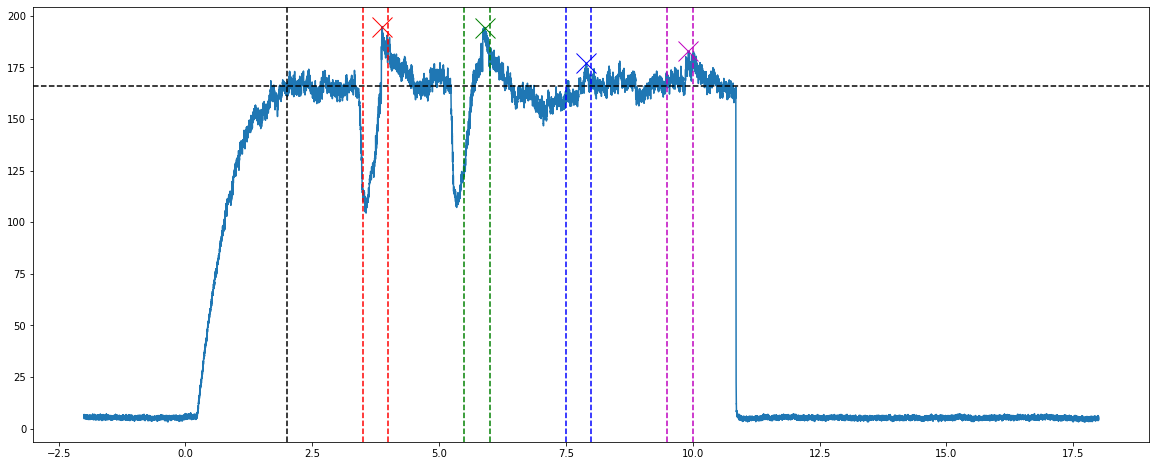

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis

main_directory_path = "Z:/AION/Data/2024/09/12/"
sub_directory_path = "shelving50A/"
dataset_path = "shelving6/" #change here
data_path = "shelving6_07.csv" #change here

file_path = main_directory_path + sub_directory_path + dataset_path + data_path

ShelvingAnalysisInstance = ShelvingAnalysis(file_path)
ShelvingAnalysisInstance.extract_data()
ShelvingAnalysisInstance.extract_ROI_peaks(plot=True)
ShelvingAnalysisInstance.extract_shelving_intensity()

C:\Users\Michael\AppData\Local\Temp/ipykernel_7928/255064835.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  ShelvingAnalysisInstance = ShelvingAnalysis(file_path)


(0.4176544350954626, 0.017364626910224255)

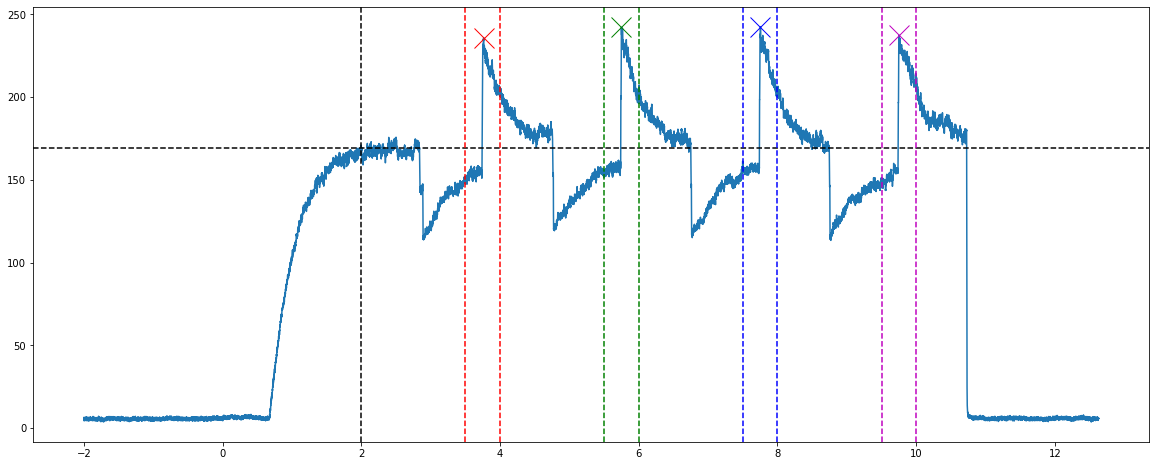

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis

main_directory_path = "Z:/AION/Data/2024/09/12/"
sub_directory_path = "shelving75A/"
dataset_path = "shelving5/" #change here
data_path = "shelving5_mirny475.csv" #change here

file_path = main_directory_path + sub_directory_path + dataset_path + data_path

ShelvingAnalysisInstance = ShelvingAnalysis(file_path)
ShelvingAnalysisInstance.extract_data()
ShelvingAnalysisInstance.extract_ROI_peaks(plot=True)
ShelvingAnalysisInstance.extract_shelving_intensity()

C:\Users\Michael\AppData\Local\Temp/ipykernel_7928/304428887.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  ShelvingAnalysisInstance = ShelvingAnalysis(file_path)


(0.3192487288365395, 0.13838997804927808)

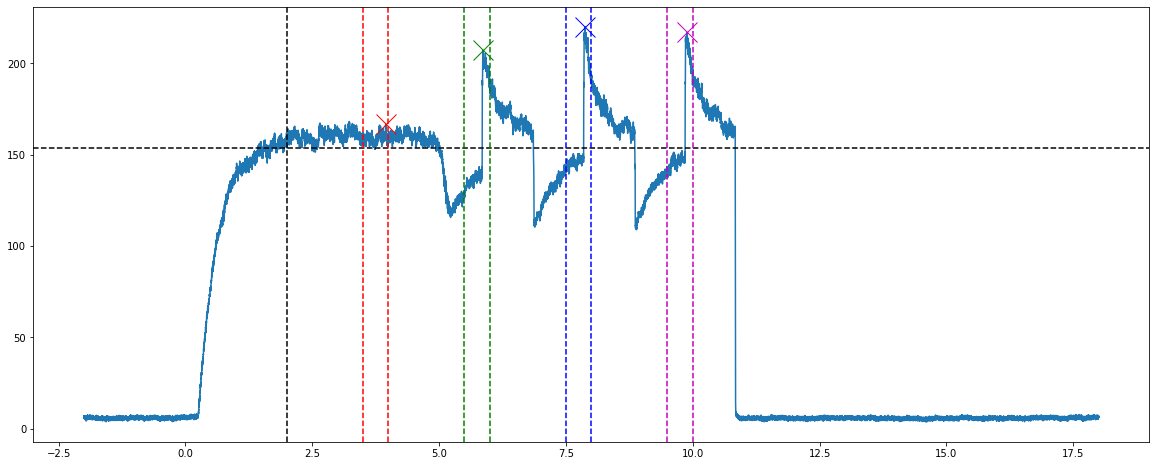

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis

main_directory_path = "Z:/AION/Data/2024/09/12/"
sub_directory_path = "shelving75A/"
dataset_path = "shelving2/" #change here
data_path = "shelving2_09.csv" #change here

file_path = main_directory_path + sub_directory_path + dataset_path + data_path

ShelvingAnalysisInstance = ShelvingAnalysis(file_path)
ShelvingAnalysisInstance.extract_data()
ShelvingAnalysisInstance.extract_ROI_peaks(plot=True)
ShelvingAnalysisInstance.extract_shelving_intensity()

# Example Analysis via Jupyter Notebook 

Extract data for Z:/AION/Data/2024/08/29/shelving_DPAOM_amp10/shelvingX/shelvingX_XX.csv, replace X with anything you like

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis

main_directory_path = "Z:/AION/Data/2024/08/29/"
sub_directory_path = "shelving_DPAOM_amp10/"
dataset_path = "shelving5/"
data_path = "shelving5_01.csv"

file_path = main_directory_path + sub_directory_path + dataset_path + data_path

In [12]:
## ----------------------------- EXTRACT DATA ----------------------------- ##

data = pd.read_csv(file_path)
time = data.iloc[1:, 0].astype(float).to_numpy() # convert to numpy
mot_pd_voltage = data.iloc[1:, 4].astype(float).rolling(window=100).mean().to_numpy() + 160 #clean mot pd voltage data with a rolling mean & convert to numpy

c:\Users\Michael\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
## ----------------------------- SECTION OUT ROIs FROM DATA ----------------------------- ##

index_average_mot_pd = 200000 #t=2s
ROI1_left = int(3.5*5e4+100000) #t=3.5s
ROI1_right = int(4*5e4+100000) #t=4s
ROI2_left = int(5.5*5e4+100000) #t=5.5s
ROI2_right = int(6*5e4+100000) #t=6s
ROI3_left = int(7.5*5e4+100000) #t=7.5s
ROI3_right = int(8*5e4+100000) #t=8s
ROI4_left = int(9.5*5e4+100000) #t=9.5s
ROI4_right = int(10*5e4+100000) #t=10s

In [14]:
## ----------------------------- EXTRACT PEAKS ----------------------------- ##

mot_pd_voltage_ROI1 = mot_pd_voltage[ROI1_left:ROI1_right]
peaks1, _ = find_peaks(mot_pd_voltage_ROI1, distance=ROI1_right-ROI1_left)
mot_pd_voltage_ROI2 = mot_pd_voltage[ROI2_left:ROI2_right]
peaks2, _ = find_peaks(mot_pd_voltage_ROI2, distance=ROI2_right-ROI2_left)
mot_pd_voltage_ROI3 = mot_pd_voltage[ROI3_left:ROI3_right]
peaks3, _ = find_peaks(mot_pd_voltage_ROI3, distance=ROI3_right-ROI3_left)
mot_pd_voltage_ROI4 = mot_pd_voltage[ROI4_left:ROI4_right]
peaks4, _ = find_peaks(mot_pd_voltage_ROI4, distance=ROI4_right-ROI4_left)


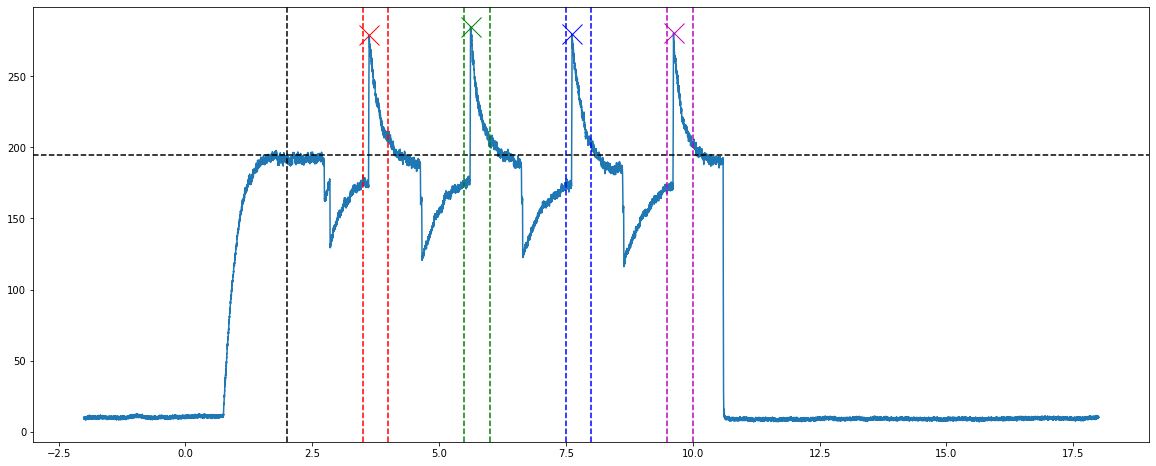

In [15]:
## ----------------------------- PLOT DATA ----------------------------- ##

plt.figure(figsize=(20, 8))
plt.plot(time, mot_pd_voltage)
plt.axvline(x=time[index_average_mot_pd], color='k', linestyle='--')
plt.axhline(y=mot_pd_voltage[index_average_mot_pd], color='k', linestyle='--')
plt.axvline(x=time[ROI1_left], color='r', linestyle='--')
plt.axvline(x=time[ROI1_right], color='r', linestyle='--')
plt.axvline(x=time[ROI2_left], color='g', linestyle='--')
plt.axvline(x=time[ROI2_right], color='g', linestyle='--')
plt.axvline(x=time[ROI3_left], color='b', linestyle='--')
plt.axvline(x=time[ROI3_right], color='b', linestyle='--')
plt.axvline(x=time[ROI4_left], color='m', linestyle='--')
plt.axvline(x=time[ROI4_right], color='m', linestyle='--')
plt.plot(time[peaks1+ROI1_left], mot_pd_voltage_ROI1[peaks1], "x", color='r', markersize=20)
plt.plot(time[peaks2+ROI2_left], mot_pd_voltage_ROI2[peaks2], "x", color='g', markersize=20)
plt.plot(time[peaks3+ROI3_left], mot_pd_voltage_ROI3[peaks3], "x", color='b', markersize=20)
plt.plot(time[peaks4+ROI4_left], mot_pd_voltage_ROI4[peaks4], "x", color='m', markersize=20)

In [16]:
## ----------------------------- GIVE DATA OUTPUT ----------------------------- ##

print("Average MOT PD Voltage: ", mot_pd_voltage[index_average_mot_pd])
print("Peak 1 values: ", time[peaks1+ROI1_left], mot_pd_voltage_ROI1[peaks1])
print("Peak 2 values: ", time[peaks2+ROI2_left], mot_pd_voltage_ROI2[peaks2])
print("Peak 3 values: ", time[peaks3+ROI3_left], mot_pd_voltage_ROI3[peaks3])
print("Peak 4 values: ", time[peaks4+ROI4_left], mot_pd_voltage_ROI4[peaks4])

## ----------------- OUTPUT SHELVING INTENSITY & UNCERTAINTY ----------------- ##

# the shelving intensity is calculated as the ratio of the peak intensity to the average intensity, normalised to the average intensity

shelving_intensity_1 = mot_pd_voltage_ROI1[peaks1]/mot_pd_voltage[index_average_mot_pd] - 1 
shelving_intensity_2 = mot_pd_voltage_ROI2[peaks2]/mot_pd_voltage[index_average_mot_pd] - 1
shelving_intensity_3 = mot_pd_voltage_ROI3[peaks3]/mot_pd_voltage[index_average_mot_pd] - 1
shelving_intensity_4 = mot_pd_voltage_ROI4[peaks4]/mot_pd_voltage[index_average_mot_pd] - 1

shelving_intensity_avg = np.mean([shelving_intensity_1, shelving_intensity_2, shelving_intensity_3, shelving_intensity_4])
shelving_intensity_uncertainty = np.std([shelving_intensity_1, shelving_intensity_2, shelving_intensity_3, shelving_intensity_4])

print("Shelving Intensity: ", shelving_intensity_avg)
print("Shelving Intensity Uncertainty: ", shelving_intensity_uncertainty)

Average MOT PD Voltage:  194.4635755
Peak 1 values:  [3.6223598] [278.82345]
Peak 2 values:  [5.62103975] [284.885582]
Peak 3 values:  [7.6227197] [279.478984]
Peak 4 values:  [9.62149965] [280.445448]
Shelving Intensity:  0.4445294717930351
Shelving Intensity Uncertainty:  0.012175147100992018


# Using Object Oriented Programming via ShelvingAnalysis.py

Extract data for Z:/AION/Data/2024/08/29/shelving_DPAOM_amp10/shelvingX/shelvingX_XX.csv, replace X with anything you like

C:\Users\Michael\AppData\Local\Temp/ipykernel_20176/2991877205.py:10: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  ShelvingAnalysisInstance = ShelvingAnalysis(file_path)


(0.4445294717930351, 0.012175147100992018)

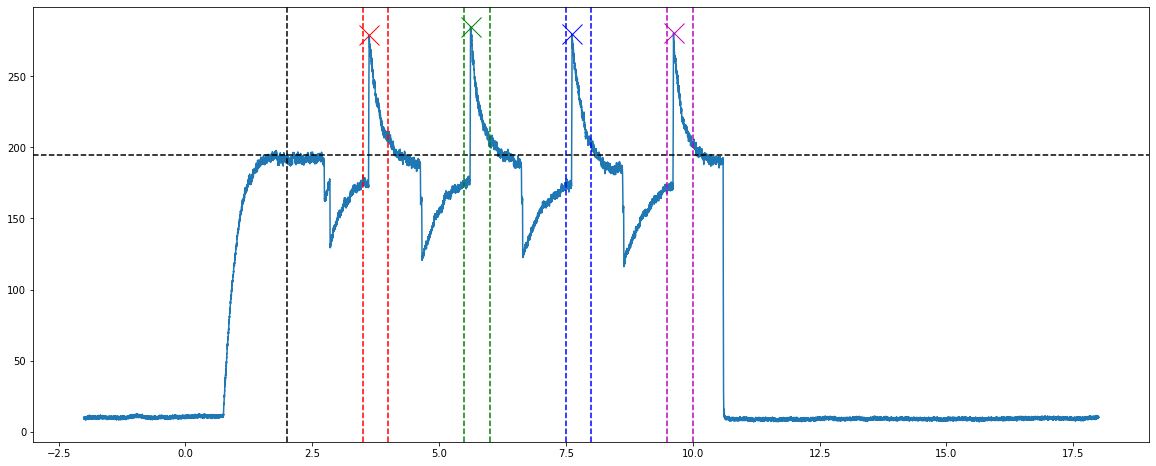

In [10]:
from ShelvingAnalysis import ShelvingAnalysis

main_directory_path = "Z:/AION/Data/2024/08/29/"
sub_directory_path = "shelving_DPAOM_amp10/"
dataset_path = "shelving5/"
data_path = "shelving5_01.csv"

file_path = main_directory_path + sub_directory_path + dataset_path + data_path

ShelvingAnalysisInstance = ShelvingAnalysis(file_path)
ShelvingAnalysisInstance.extract_data()
ShelvingAnalysisInstance.extract_ROI_peaks(plot=True)
ShelvingAnalysisInstance.extract_shelving_intensity()